# Comparação de poder dos testes Z e Binomial.

Alunos: Guilherme Lisboa (GRR20170414), Felipe Heron Queluz (GRR20170400), Rodrigo Alves Silva (GRR20214488) e Wu Hsuan Yi (GRR20170415)

## Poder de um teste

O poder um teste é a probabilidade de rejeitar $H_0$ quando $H_1$ é verdadeira, ou seja: $Poder = P(Rejeitar H_0 | H_1 verdadeira)$. Para calcular esta probabilidade, serão utilizados os valores de $\alpha$ e $\beta$, respectivamente, probabilidades dos erros tipo I e II. Assim, temos as seguintes definições envolvidas no cálculo do poder de um teste:

$$
\begin{gather}
    \alpha = P(Reiejtar H_0 | H_0 verdadeira) = P(Erro Tipo I) \\
    \beta = P(Aceitar H_0 | H_1 verdadeira) = P(Erro Tipo II) \\
    Poder = P(Reiejtar H_0 | H_1 verdadeira) = 1 - \beta \\
\end{gather}
$$

Gráficamente, é possível vizualisar como estas probabilidades se sobrepõem. Seja a curva verde uma distribuição que segue uma Normal(0, 1) para $H_0$ verdadeira e a curva azul uma Normal(2, 1) para $H_1$ verdadeira, temos:

![Areas Alfa, Beta e Poder](./imagens/desafio_3_areas_poder.PNG)
Fonte: http://labtrop.ib.usp.br/lib/exe/fetch.php?media=cursos:planeco:planeco:material:PowerAnalysisSampleSize.pdf

## Teste Z

O teste Z poder ser aplicado quando a estatística de teste sob a hipótese nula segue uma distribuição Normal~($\mu$, $\sigma^2$).
Assim, seguindo o procedimento usual, temos as seguintes etapas:

- Estimar $\mu$ e $\sigma$ sob $H_0$
- Definir a hipótese $H_1$ como bilateral ou unilateral
- Calcular o escore Z, dado por $Z_{calc} = \frac{\bar{X} - \mu_0}{\sigma}$
- Comparar o escore calculado $Z_{calc}$ com o escore Z correspondente ao $\alpha$ pré-determinado como limite para rejeição de $H_0$:
  - $Z_{calc}$ < $Z_{\alpha}$: rejeitar $H_0$
  - $Z_{calc}$ > $Z_{\alpha}$: não rejeitar $H_0$


## Teste Binomial

O teste Binomial poder ser aplicado quando a estatística de teste é a proporção de sucessos de $n$ repetições de um experimento dicotômico. Assim, testamos se sob $H_0$ a estatística de teste segue uma Binomial~(n, p) realizando, usualmente, as seguintes etapas:

- definir a probabilidade esperada de sucessos ($\pi_0$) sob $H_0$.
- calcular a probabilidade $P(X = k)$, onde $k$ é o número de sucessos esperado sob $H_0$, ou seja, $n\pi_0$
- comparar $P(X = k)$ anterior com o valor esperado para o $\alpha$ pré-determinado


## Cálculo do poder de teste Z e Binomial

### Poder teste Z

O poder do teste Z é calculado dado um $\alpha$ pré-determinado, usado para encontrar o intervalo de confiança. Então, deslocamos o intervalo de confiança para o valor esperado caso $H_1$ seja verdadeiro e calculamos $\beta$. Por fim, temos que o Poder do teste é dado por $1 - \beta$.

In [232]:
import numpy as np
from scipy.stats import norm as Normal


def calcular_poder_do_teste_z(
    valor_esperado_h0: np.number,
    valor_esperado_h1: np.number,
    desvio_padrao: np.number,
    n: np.number,
    alfa: np.number,
) -> np.number:
    desvio_padrao_sobre_raiz_n = desvio_padrao / np.sqrt(n)
    erro = Normal.ppf(1 - alfa / 2) * desvio_padrao_sobre_raiz_n
    intervalo_confianca = (valor_esperado_h0 - erro, valor_esperado_h0 + erro)

    intervalo_esperado_h1 = (
        (intervalo_confianca[0] - valor_esperado_h1) / desvio_padrao_sobre_raiz_n,
        (intervalo_confianca[1] - valor_esperado_h1) / desvio_padrao_sobre_raiz_n,
    )
    p_beta = Normal.cdf(intervalo_esperado_h1[1]) - Normal.cdf(intervalo_esperado_h1[0])

    return 1 - p_beta


### Poder teste Binomial

Como a distribuição Binomial é discreta, devemos encontrar o intervalo de valores críticos para $k$ (número de sucessos) cuja soma de probabilidade não ultrapasse $\alpha$.
O valor crítico inferior é a probabilidade de encontrarmos $k \leq c_{inferior}$ caso $H_1$ seja verdadeira, já o valor crítico superior é a probabilidade de encontrarmos $k \ge c_{superior}$. Estamos probabilidade somadas nos dão a probabilidade de rejeitar $H_0$ sob a $H_1$ verdadeira, ou seja, o poder do teste.

In [233]:
from scipy.stats import binom as Binomial


def calcular_poder_do_teste_binomial(
    p_h0: np.number,
    p_h1: np.number,
    n: np.number,
    alfa: np.number,
) -> np.number:
    valor_critico_inferior = Binomial.ppf(alfa / 2, n, p_h0)
    poder_inferior = Binomial.cdf(valor_critico_inferior, n, p_h1)

    valor_critico_superior = Binomial.ppf(1 - alfa / 2, n, p_h0)
    poder_superior = 1 - Binomial.cdf(valor_critico_superior, n, p_h1)

    return poder_inferior + poder_superior


## Comparação: tamanho da amostra

A seguir, vemos o comportamento dos testes conforme o número de amostras cresce, de $n = 2$ até $n = 100$. Os demais parâmetros são fixos.

In [234]:
intervalo_n = np.arange(2, 101, 1)
desvio_padrao = 1
alfa = 0.05

media_esperada_h0 = 0
media_esperada_h1 = media_esperada_h0 + desvio_padrao

p_h0 = 0.5
p_h1 = p_h0 + p_h0 * (1 - p_h0)


poder_teste_z = np.empty(len(intervalo_n))
poder_teste_binomial = np.empty(len(intervalo_n))

for (i, n) in enumerate(intervalo_n):
    poder_teste_z[i] = calcular_poder_do_teste_z(
        media_esperada_h0, media_esperada_h1, desvio_padrao, n, alfa
    )
    poder_teste_binomial[i] = calcular_poder_do_teste_binomial(p_h0, p_h1, n, alfa)


Fazendo o gráfico da evolução do poder dos testes em função do tamanho da amostra, temos:

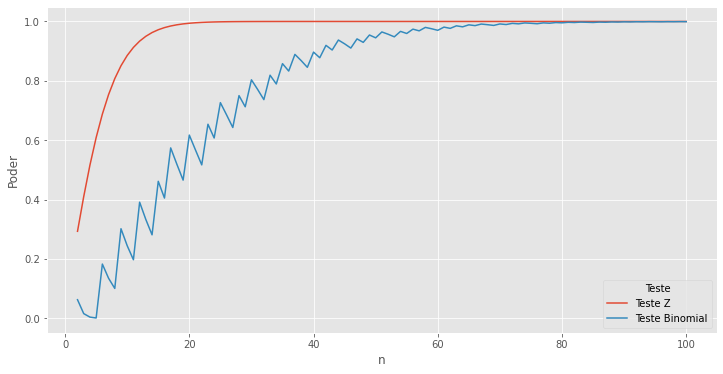

In [235]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(12, 6))

resultado = pd.DataFrame(
    {
        "n": intervalo_n,
        "Teste Z": poder_teste_z,
        "Teste Binomial": poder_teste_binomial,
    }
)

resultado = resultado.melt("n", var_name="Teste", value_name="Poder")

sns.lineplot(data=resultado, x="n", y="Poder", hue="Teste");


Assim, é possível notar que pelo fato da Binomial ser discreta, os valores críticos inferior e superior fazem com que que haja uma queda no poder do teste até um valor $n$ que permita considerar novos valores críticos. O intervalo entre estes picos no poder do teste diminui conforme $n$ aumenta, fazendo com que a estatística de teste tenha um valor aproximadamente contínuo.

## Comparação: diferença suposições $H_0$ e $H_1$

Como vimos na comparação anterior que para $n \gt 65$ o poder dos testes é similar, comparamos então qual a resposta em função da diferença entre o valor suposto como verdadeiro em $H_0$ com o valor suposto em $H_1$.

In [236]:
intervalo_diferenca = np.arange(0.01, 0.99, 0.01)
alfa = 0.05

media_esperada_h0 = 0
desvio_padrao = 1


def media_esperada_h1(media_esperada_h0, desvio_padrao, diferenca):
    return media_esperada_h0 + desvio_padrao * diferenca


p_h0 = 0.5


def p_h1(p_h0, diferenca):
    return p_h0 + p_h0 * (1 - p_h0) * diferenca


poder_teste_z = np.empty(len(intervalo_diferenca))
poder_teste_binomial = np.empty(len(intervalo_diferenca))

for (i, diferenca) in enumerate(intervalo_diferenca):
    poder_teste_z[i] = calcular_poder_do_teste_z(
        media_esperada_h0,
        media_esperada_h1(media_esperada_h0, desvio_padrao, diferenca),
        desvio_padrao,
        n,
        alfa,
    )
    poder_teste_binomial[i] = calcular_poder_do_teste_binomial(
        p_h0, p_h1(p_h0, diferenca), n, alfa
    )


Fazendo o gráfico da evolução do poder dos testes em função da diferença entre as hipóteses $H_0$ e $H_1$, temos:

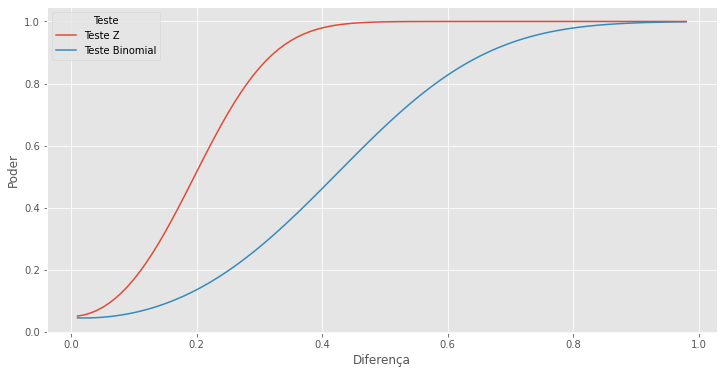

In [237]:
resultado = pd.DataFrame(
    {
        "Diferença": intervalo_diferenca,
        "Teste Z": poder_teste_z,
        "Teste Binomial": poder_teste_binomial,
    }
)

resultado = resultado.melt("Diferença", var_name="Teste", value_name="Poder")

plt.figure(figsize=(12, 6))
sns.lineplot(data=resultado, x="Diferença", y="Poder", hue="Teste");


Ambos os testes tem um poder baixo quando a diferença entre os valores testados sob $H_0$ e $H_1$ é pequena. O teste Z apresenta uma evolução mais rápida, passando de 0,8 já com uma diferença de aproximadamente 0,3$\sigma$. Já o teste binomial só passa a ter uma valor de poder acima de 0,8 para diferenças próximas de 0,6$\sigma$